In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# training data generation
m = 100
x1 = 8 * np.random.rand(m, 1)
x2 = 7 * np.random.rand(m, 1) - 4

g = 0.8 * x1 + x2 - 3

In [32]:
C1 = np.where(g >= 1)
C2 = np.where(g < -1)

In [45]:
X1 = np.vstack([np.ones(len(C1[0])), x1[C1], x2[C1]]).T
X2 = np.vstack([np.ones(len(C2[0])), x1[C2], x2[C2]]).T

In [63]:
X = np.vstack([X1,X2])
y = np.hstack([np.ones([len(C1[0])]), -np.ones([len(C2[0])])])
X = np.asmatrix(X)
y = np.asmatrix(y).T

In [64]:
w = np.ones([3,1])
w = np.asmatrix(w)

In [72]:
n_iter = y.shape[0]
n_iter

71

In [73]:
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:] * w)[0,0]:
            w += y[i,0] * X[i,:].T

print(w)

[[-19.        ]
 [  8.05843491]
 [ 17.63577304]]


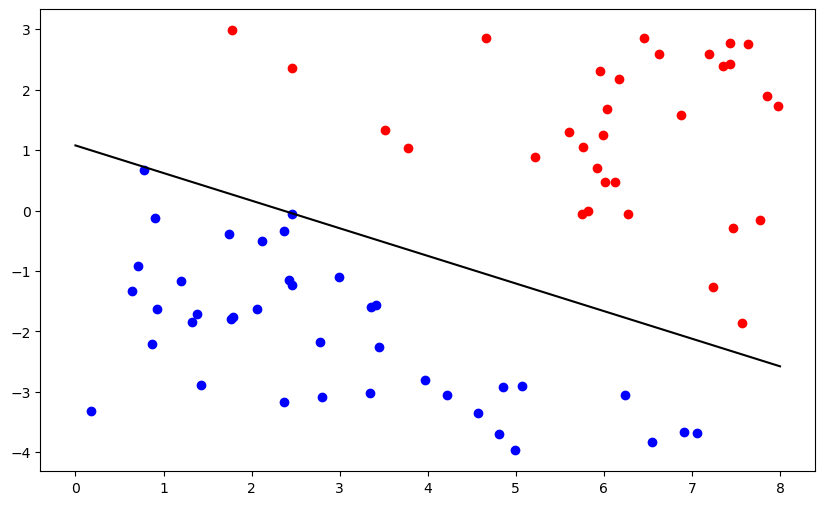

In [74]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = -w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10,6))
plt.scatter(x1[C1], x2[C1], c='r', label='C1')
plt.scatter(x1[C2], x2[C2], c='b', label='C2')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.show()

In [78]:
from sklearn import linear_model

X1 = np.vstack([x1[C1], x2[C1]]).T
X2 = np.vstack([x1[C2], x2[C2]]).T

X = np.vstack([X1,X2])
y = np.hstack([np.ones([len(C1[0])]), -np.ones([len(C2[0])])])

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))
clf.predict([[3, -2]])

array([-1.])